In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000, size= 1500)
lngs= np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Use the print() ufnction to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-61.746215482518764 -113.69725906214826
-86.93424099292618 103.7267318807987
-87.4958627840496 -169.81325637975706
49.172328916398044 44.54626087116961
-34.715856674713955 -30.43032099237891
52.12118295538721 111.59740047994558
-33.90490658810006 -31.654049308018358
2.062736231882056 -9.913951284290988
57.2495300777872 168.216498270697
-55.7771956111476 -20.35434299236036
46.572492304581345 -140.08863586823162
10.48861148320428 -31.91112010563367
51.77715095911091 82.88264212680883
-66.78286296174865 -145.84052261477146
-24.39890091841754 148.396545562202
-15.006257096986289 96.89844689978406
-25.377709009426354 138.5501844658238
-34.1088196482498 122.68338359132935
43.684035329199446 119.86426669303626
-45.2447992919334 -102.50011806526152
-86.60609162335679 -118.12511581532085
-34.324762405057086 58.7423552134392
-41.341297608563366 85.66403316042198
-54.091274950395196 -85.9502326804434
56.68343608177358 171.87751312872598
88.64864793175829 46.51964043752184
13.564532029926625 -23.2

-86.32697637520754 -66.43749246579897
19.823928171927264 -128.54642455751934
-70.3576539525848 -132.6331417022816
40.29717919464164 174.49594970587748
60.495232736735176 157.55463498207064
-33.83132809767302 -2.400425216414817
2.1461858210405893 -17.747231519977703
-4.945425535561469 -107.08727990375432
-57.36077479830877 177.75425398006905
-70.35694035869342 178.6653623472103
-41.82416609922741 168.3368966110295
16.171602861608875 -111.57332187622164
27.0051719790402 -65.51609232828594
-15.6795356486912 -11.122914218915781
21.872134735979202 -5.986547969638963
60.9719703838181 -110.76249707286988
82.47775591225644 164.5401129510784
-52.511854931375936 89.42755195194906
-15.05802839937354 -109.41265726296629
21.61355003148408 23.418403634687962
62.32121124046799 63.911869321035056
56.681232685345236 67.96787567361733
-44.148607521708335 -6.2588673670384765
7.9799954182795005 -75.47499790845328
-21.35736968693101 23.974805370842205
80.19687003617756 -18.807404676858283
-11.4598089993168

In [5]:
from citipy import citipy

In [6]:
#Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination. 
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count.
len(cities)

605

In [7]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=56704f47c904e41ddefeadd265c03ac2


In [9]:
#Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_country = city_weather["sys"]["country"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        description = city_weather['weather'][0]['description']
        
        # Convert the date to ISO
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information to the city_data list
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Current Description":description,
                         "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | dubovka
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | sosnovo-ozerskoye
Processing Record 7 of Set 1 | harper
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | sao filipe
Processing Record 11 of Set 1 | krasnoshchekovo
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | emerald
Processing Record 14 of Set 1 | labuhan
Processing Record 15 of Set 1 | mount isa
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | chifeng
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 22 of Set 1 | 

Processing Record 36 of Set 4 | penarroya-pueblonuevo
Processing Record 37 of Set 4 | sinnamary
Processing Record 38 of Set 4 | barrow
Processing Record 39 of Set 4 | iqaluit
Processing Record 40 of Set 4 | lorengau
Processing Record 41 of Set 4 | leningradskiy
Processing Record 42 of Set 4 | martapura
Processing Record 43 of Set 4 | neyshabur
Processing Record 44 of Set 4 | henzada
City not found. Skipping...
Processing Record 45 of Set 4 | dauriya
Processing Record 46 of Set 4 | mehamn
Processing Record 47 of Set 4 | yar-sale
Processing Record 48 of Set 4 | iskateley
Processing Record 49 of Set 4 | hovd
Processing Record 50 of Set 4 | longyearbyen
Processing Record 1 of Set 5 | riyadh
Processing Record 2 of Set 5 | ripon
Processing Record 3 of Set 5 | coihaique
Processing Record 4 of Set 5 | nguiu
City not found. Skipping...
Processing Record 5 of Set 5 | baherden
Processing Record 6 of Set 5 | fairbanks
Processing Record 7 of Set 5 | sorland
Processing Record 8 of Set 5 | mananjary


Processing Record 27 of Set 8 | general roca
Processing Record 28 of Set 8 | quatre cocos
Processing Record 29 of Set 8 | mao
Processing Record 30 of Set 8 | hualmay
Processing Record 31 of Set 8 | santa maria
Processing Record 32 of Set 8 | guerrero negro
Processing Record 33 of Set 8 | biak
Processing Record 34 of Set 8 | invermere
Processing Record 35 of Set 8 | pacific grove
Processing Record 36 of Set 8 | vila franca do campo
Processing Record 37 of Set 8 | tornio
Processing Record 38 of Set 8 | aklavik
Processing Record 39 of Set 8 | saurimo
Processing Record 40 of Set 8 | alappuzha
Processing Record 41 of Set 8 | zachagansk
City not found. Skipping...
Processing Record 42 of Set 8 | meridian
Processing Record 43 of Set 8 | omsukchan
Processing Record 44 of Set 8 | chivilcoy
Processing Record 45 of Set 8 | sindand
City not found. Skipping...
Processing Record 46 of Set 8 | upernavik
Processing Record 47 of Set 8 | zvenigovo
Processing Record 48 of Set 8 | erzurum
Processing Recor

Processing Record 15 of Set 12 | port macquarie
Processing Record 16 of Set 12 | baoqing
Processing Record 17 of Set 12 | aflu
City not found. Skipping...
Processing Record 18 of Set 12 | ayorou
Processing Record 19 of Set 12 | kemijarvi
Processing Record 20 of Set 12 | aripuana
Processing Record 21 of Set 12 | rognan
Processing Record 22 of Set 12 | shahrud
Processing Record 23 of Set 12 | teknaf
Processing Record 24 of Set 12 | tank
Processing Record 25 of Set 12 | staryy nadym
Processing Record 26 of Set 12 | russellville
Processing Record 27 of Set 12 | namatanai
Processing Record 28 of Set 12 | benton harbor
Processing Record 29 of Set 12 | saint-augustin
Processing Record 30 of Set 12 | norrtalje
Processing Record 31 of Set 12 | bubaque
Processing Record 32 of Set 12 | koygorodok
Processing Record 33 of Set 12 | orange cove
Processing Record 34 of Set 12 | nianzishan
Processing Record 35 of Set 12 | gazli
Processing Record 36 of Set 12 | svetlaya
Processing Record 37 of Set 12 | 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description,Date
0,Punta Arenas,CL,-53.1500,-70.9167,48.31,71,75,4.61,light rain,2022-08-29 21:25:55
1,Albany,US,42.6001,-73.9662,91.26,53,28,4.00,scattered clouds,2022-08-29 21:22:48
2,Vaini,TO,-21.2000,-175.2000,77.16,78,40,3.44,scattered clouds,2022-08-29 21:25:55
3,Dubovka,RU,49.0583,44.8290,83.35,31,25,9.42,scattered clouds,2022-08-29 21:25:56
4,Arraial Do Cabo,BR,-22.9661,-42.0278,66.06,72,75,13.80,broken clouds,2022-08-29 21:25:56
5,Sosnovo-Ozerskoye,RU,52.5249,111.5418,34.54,73,42,7.02,scattered clouds,2022-08-29 21:25:56
6,Harper,LR,4.3750,-7.7169,76.30,83,46,9.71,scattered clouds,2022-08-29 21:25:57
7,Nikolskoye,RU,59.7035,30.7861,62.87,86,93,9.55,overcast clouds,2022-08-29 21:23:13
8,Sitka,US,57.0531,-135.3300,62.49,72,40,12.66,light rain,2022-08-29 21:25:57
9,Sao Filipe,CV,14.8961,-24.4956,78.12,80,100,11.90,overcast clouds,2022-08-29 21:25:58


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]

In [16]:
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-08-29 21:25:55,-53.1500,-70.9167,48.31,71,75,4.61
1,Albany,US,2022-08-29 21:22:48,42.6001,-73.9662,91.26,53,28,4.00
2,Vaini,TO,2022-08-29 21:25:55,-21.2000,-175.2000,77.16,78,40,3.44
3,Dubovka,RU,2022-08-29 21:25:56,49.0583,44.8290,83.35,31,25,9.42
4,Arraial Do Cabo,BR,2022-08-29 21:25:56,-22.9661,-42.0278,66.06,72,75,13.80
...,...,...,...,...,...,...,...,...,...
549,Sandpoint,US,2022-08-29 21:28:41,48.2766,-116.5533,86.45,35,0,1.01
550,Constitucion,CL,2022-08-29 21:28:41,-35.3333,-72.4167,58.35,76,47,9.84
551,Antigonish,CA,2022-08-29 21:24:19,45.6169,-61.9986,77.14,64,93,4.00
552,Monterotondo,IT,2022-08-29 21:28:41,42.0525,12.6187,77.92,79,0,1.99


In [17]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
#Extract relevant fields from the DataFrame for plotting.
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity= city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

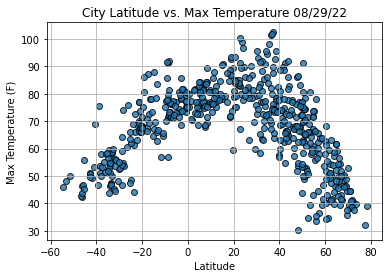

In [22]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

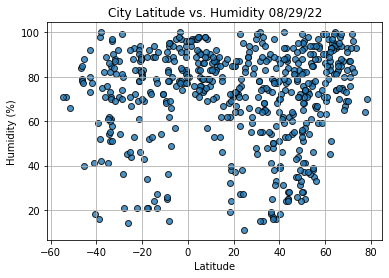

In [23]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

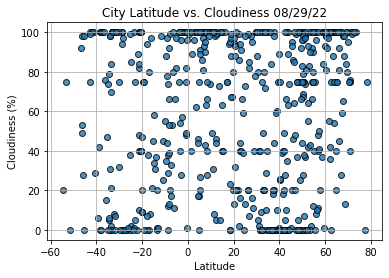

In [24]:
#Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

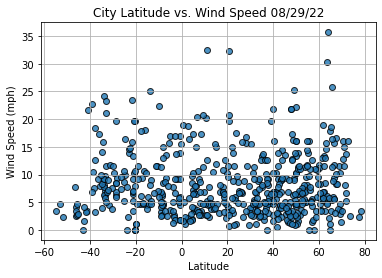

In [25]:
#Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()